In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
switch = {
    'no' : 0,
    'yes' : 1
}
data.sold = data.sold.map(switch)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [3]:
from datetime import datetime

current_year = datetime.today().year
data['model_age'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [4]:
data['km_per_year'] = data.mileage_per_year * 1.60934
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [5]:
data = data.drop(columns=['Unnamed: 0', 'mileage_per_year', 'model_year'], axis=1)
data.head()

,price,sold,model_age,km_per_year
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [6]:
X = data[['price', 'model_age', 'km_per_year']]
y = data['sold']

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 20
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify= y)
print(f'Training with {len(X_train)} and testing with {len(X_test)} elements')

model = LinearSVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions) * 100
print(f'Accuracy was {accuracy:.2f}')

Training with 7500 and testing with 2500 elements
Accuracy was 57.00


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [7]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(X_train, y_train)
accuracy = dummy_stratified.score(X_test, y_test)

print(f'Accuracy was {accuracy:.2f}')

Accuracy was 0.52


In [8]:
from sklearn.dummy import DummyClassifier

dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(X_train, y_train)
predictions = dummy_most_frequent.predict(X_test)

accuracy = accuracy_score(y_test, predictions) * 100
print(f'Accuracy was {accuracy:.2f}')

Accuracy was 58.00


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 20
np.random.seed(SEED)

raw_X_train, raw_X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify= y)
print(f'Training with {len(X_train)} and testing with {len(X_test)} elements')

scaler = StandardScaler()
scaler.fit(raw_X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions) * 100
print(f'Accuracy was {accuracy:.2f}')


Training with 7500 and testing with 2500 elements
Accuracy was 75.92


# Decision Tree

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify= y)
print(f'Training with {len(X_train)} and testing with {len(X_test)} elements')

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions) * 100
print(f'Accuracy was {accuracy:.2f}')

Training with 7500 and testing with 2500 elements
Accuracy was 79.28


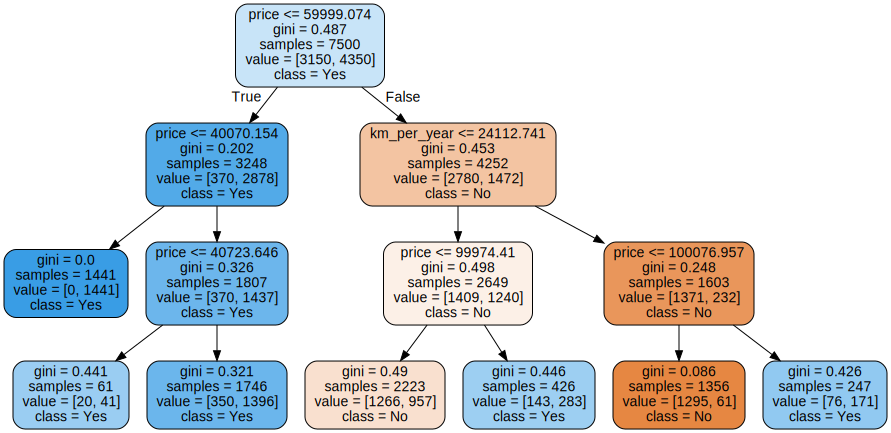

In [23]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None, filled=True, rounded=True, 
                           feature_names=X.columns, class_names=['No','Yes'])
graph = graphviz.Source(dot_data)
graph